# **Μηχανική Μάθηση**
## *Ονοματεπώνυμο: Αποστολοπούλου Αλεξάνδρα*
## *ΑΜ: 1115201700005*

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
import glob
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.decomposition import PCA
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

## ***Question 1*** - *Προ-επεξεργασία, μείωση διαστάσεων, οπτικοποίηση και ταξινόμηση εικόνων*

**1)** Σε αυτό το ερώτημα ζητήθηκε να γραφθεί μία συνάρτηση loadImages(path) η οποία θα διαβάζει τις εικόνες, θα τις μετατρέπει σε διάσταση 100 x100 pixels και θα επιστέφει έναν πίνακα δεδομένων 30 στηλών, όπου κάθε εικόνα  αναπαρίσταται ως διάνυσμα στήλη. Γι' αυτό το σκέλος του ερωτήματος απλά χρησιμοποίησα την imread() συνάρτηση προκειμένου να διαβάσω τις εικόνες , καθώς και την resize() για να αλλάξω την διάσταση κάθε εικόνας. Επίσης για να μετατρέψω τις εικόνες σε διάνυσμα-στήλη χρησιμοποίησα την παράμετρο reshape(-1). Τέλος για να πάρω τα labels κάθε εικόνας απλά βρήκα την κατάλληλη θέση του γράμματος του ονόματος της εικόνας.

In [3]:
def loadImages(path):
  
  #Take all the images
  images = glob.glob(path + "/" + "*.jpg")
  
  image2vector_array = []  
  labels = []

  for i in images:
    #Read the images
    img=mpimg.imread(i)
    
    # print(img.shape)
    # imgplot = plt.imshow(img)
    # plt.show()

    #Print the original shape of the image
    print("The original shape of image: ",img.shape)
    
    #Resize the size of the pixels of images in (100,100) pixels.
    #Then we have a 3d array of shape (100,100,3)
    img = cv2.resize(img, dsize=(100, 100), interpolation=cv2.INTER_CUBIC)
    
    #Print the changed shape of the image
    print("The changed shape of image: ",img.shape)

    #Turn every image to a vector of shape (30000,1)
    image2vector_array.append(img.reshape(-1))

    #Find the label of each image
    if i[47] == "W":
      labels.append(0)
    elif i[47] == "F":
      labels.append(1)
    elif i[47] == "S":
      labels.append(2)

    # imgplot = plt.imshow(img)
    # plt.show()

  #Return the array of 30 vectors and the array of labels of each image 
  return np.array(image2vector_array), np.array(labels)
    


path = "/content/drive/My Drive/Colab Notebooks/images/"
array_of_vectors, labels = loadImages(path)

print(array_of_vectors)
print("Shape of the array:", array_of_vectors.shape)
print("Labes of photos:", labels)

The original shape of image:  (250, 250, 3)
The changed shape of image:  (100, 100, 3)
The original shape of image:  (250, 250, 3)
The changed shape of image:  (100, 100, 3)
The original shape of image:  (250, 250, 3)
The changed shape of image:  (100, 100, 3)
The original shape of image:  (250, 250, 3)
The changed shape of image:  (100, 100, 3)
The original shape of image:  (233, 250, 3)
The changed shape of image:  (100, 100, 3)
The original shape of image:  (250, 250, 3)
The changed shape of image:  (100, 100, 3)
The original shape of image:  (250, 250, 3)
The changed shape of image:  (100, 100, 3)
The original shape of image:  (250, 250, 3)
The changed shape of image:  (100, 100, 3)
The original shape of image:  (250, 250, 3)
The changed shape of image:  (100, 100, 3)
The original shape of image:  (250, 250, 3)
The changed shape of image:  (100, 100, 3)
The original shape of image:  (250, 250, 3)
The changed shape of image:  (100, 100, 3)
The original shape of image:  (200, 250, 3)

**2)** Σε αυτό το ερώτημα ζητήθηκε να γραφθεί μία συνάρτηση PCA_ImageSpaceVisualization(Χ), η οποία θα παίρνει ως είσοδο τον παραπάνω πίνακα δεδομένων, θα υπολογίζει τις δύο πρώτες κύριες συνιστώσες των δεδομένων και θα προβάλει τα δεδομένα σε αυτές τις κύριες συνιστώσες. Η συνάρτηση επιστέφει ένα plot στο οποίο οπτικοποιούνταιοι εικόνες στο δυσδιάστατο χώρο που προκύπτει από τη προβολή των δεδομένων στις δύο πρώτες κύριες συνιστώσες.

Εδώ αποφάσισα να χρησιμοποιήσω την PCA από την βιβλιοθήκη της sklearn, προκειμένου να υπολογίζω τις δύο πρώτες συνιστώσες. Έτσι όπως φαίνεται και στο πρώτο διάγραμμα το μέγεθος του πίνακα πρίν την εφαρμογή του PCA ήταν (30,30000) κι ύστερα από την εφαρμογή του μειώθηκε στο (30,2), όπως και αναμενόταν να συμπιεστούν σε δύο διαστάσεις. Στο πρώτο σχήμα φαίνονται τα σημεία (x,y) των εικόνων σε μορφή markers, κι έπειτα καλώ την συνάρτηση Images_Instead_of_Markers() έτσι ώστε να εισάγω πάνω στα σημεία τις αντίστοιχες εικόνες. Για τον σκοπό αυτό επέλεξα να χρησιμοποίησω την συνάρτηση OffsetImage μέσα απ' την AnnotationBbox της βιβλιοθήκης matplotlib.

In [4]:
def Images_Instead_of_Markers(Principal_Components, images):

  print("\n")

  # paths = glob.glob("/content/drive/My Drive/Colab Notebooks/images/" + "/" + "*.jpg")

  x = Principal_Components[:,0]
  y = Principal_Components[:,1]

  fig, ax = plt.subplots(figsize=(18,9))  
  ax.set_xlim(-1.7, 2)
  ax.set_ylim(-3, 3.2)
  plt.xlabel('First principal component', fontsize=20, color="violet")
  plt.ylabel('Second Principal Component', fontsize=20, color="violet")
  ax.scatter(x, y) 

  for x0, y0, image in zip(x, y, images):
      ab = AnnotationBbox(OffsetImage(image.reshape(100,100,3), zoom=0.8), (x0, y0))
      ax.add_artist(ab)

Shape of array before PCA Visualization:  (30, 30000)
Shape of array after PCA Visualization:  (30, 2)




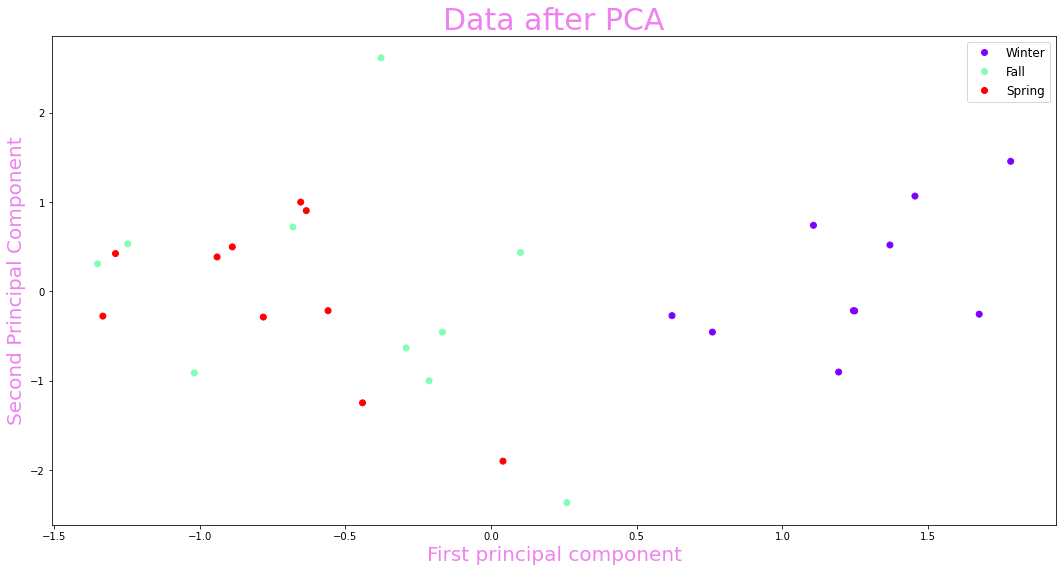

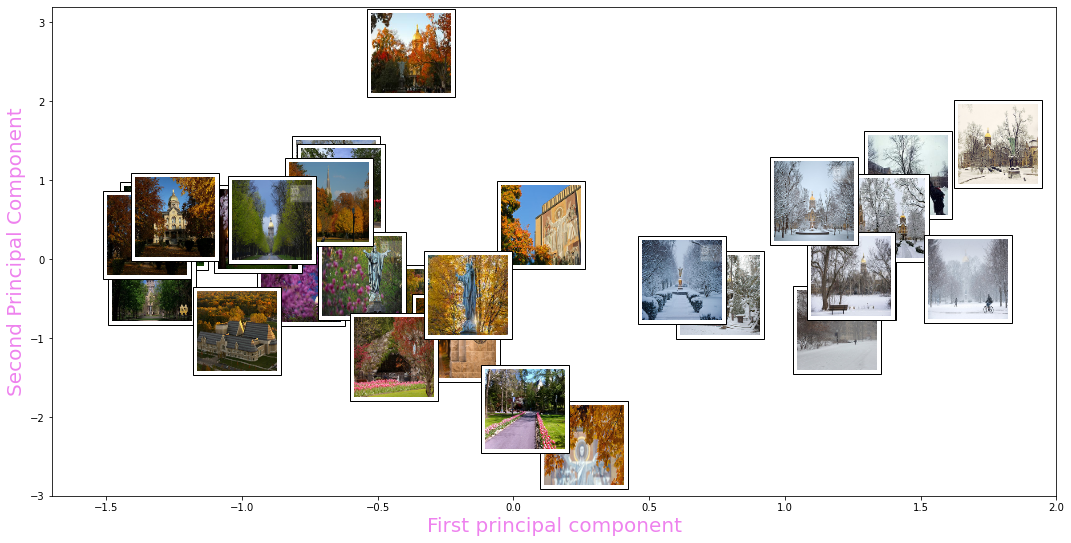

In [5]:
def PCA_ImageSpaceVisualization(X):
  print("Shape of array before PCA Visualization: ", X.shape)

  #Compute a PCA with 2 components
  pca = PCA(n_components=2, whiten=True).fit(X)

  Principal_Components = pca.transform(X)

  #Show the plot
  print("Shape of array after PCA Visualization: ", Principal_Components.shape)

  plt.figure(figsize=(18,9))
  plt.title('Data after PCA',fontsize=30, color="violet")
  classes = ['Winter', 'Fall', 'Spring']
  scatter = plt.scatter(Principal_Components[:,0],Principal_Components[:,1],c=labels,cmap='rainbow')
  plt.xlabel('First principal component', fontsize=20, color="violet")
  plt.ylabel('Second Principal Component', fontsize=20, color="violet")
  plt.legend(handles=scatter.legend_elements()[0], labels=classes, fontsize=12)

  #Replace the markers with the images 
  Images_Instead_of_Markers(Principal_Components, X)

  return Principal_Components

Principal_Components = PCA_ImageSpaceVisualization(array_of_vectors)

**2.1)** O Aλγόριθμος **Principal Component Analysis** μας βοηθάει στην οπτικοποίηση των δεδομένων μας (συνήθως 2 ή 3 διαστάσεις). Στην ουσία με τον PCA συμπιέσαμε τα δεδομένα μας σε 2 διαστάσεις, έτσι ώστε να τα κατανοήσουμε καλύτερα και να μπορούμε να συνάγουμε εύκολα, διάφορα συμπεράσματα, αφού ο ανθρώπινος νους δεν μπορεί να αντιληφθεί δεδομένα πέρα των τριών διαστάσεων του χώρου. Έτσι, λοιπόν, διατηρώντας την διασπορά των δεδομένων, αυτά μετασχηματίζονται γραμμικά σε ένα νέο σύστημα συντεταγμένων όπου ο άξονας με την μεγαλύτερη διασπορά γίνεται ο πρώτος κύριως άξονας και με την δεύτερη μεγαλύτερη διασπορά ο δεύτερος κύριως άξονας. Συνεπώς, όταν εκτυπώνουμε το αρχικό shape όλων των εικόνων παρατηρήσαμε ότι ήταν (30, 30.000), δηλαδή ήταν οπτικοποιημένες σε μορφή 30.000 διαστάσεων. Ύστερα, όμως, από την εφαρμογή του PCA σε δύο πρώτες κύριες συνιστώσες, το shape τους ήταν πλέον (30, 2), δηλαδή οι διαστάσεις μειώθηκαν στις 2, κι έτσι μπορέσαμε να τις οπτικοποιήσουμε στον δισδιάστατο χώρο με μορφή σημείων επάνω στο γράφημα. 

***Παρατήρηση:*** Εύκολα μπορεί κανείς να παρατηρήσει ότι τείνουν να ομαδοποιούνται οι εικόνες που παρουσιάζουν παρόμοια χαρακτηρηστικά, ως προς το χρώμα. Για παράδειγμα, οι εικόνες του χειμώνα (κυριαρχεί το άσπρο) βρίσκονται αρκετά μακρυά από τις εικόνες της άνοιξης και του φθινοπώρου (όπου κυριαρχούν συνήθως τα πιο ζεστά χρώματα).

###***Τι σημαίνει όταν εικόνες βρίσκονται κοντά σε αυτό το χώρο δύο διαστάσεων που απεικονίζεται στο παραπάνω plot;***

Όταν οι εικόνες βρίσκονται κοντά σε αυτόν τον χώρο δύο διαστάσεων, σημαίνει ότι ανήκουν στην ίδια εποχή, αν και αυτός ο κανόνας μπορεί να γενικευτεί περισσότερο για τον χειμώνα, παρά για την άνοιξη και το φθινόπωρο (θα αναλυθεί περισσότερο στην συνέχεια). Bέβαια, μπορεί να παρατηρήσει κανείς, πως οι εικόνες της άνοιξης τείνουν να ομαδοποιούνται προς τα αριστερά, ενώ οι εικόνες του φθινοπώρου τείνουν προς την μέση του γραφήματος.

###***Τι σημαίνει όταν εικόνες απέχουν πολύ;***

Όταν οι εικόνες απέχουν πολυ, σημαίνει ότι δεν ανήκουν στην ίδια εποχή. Αυτό όμως πάλι δεν μπορεί να αποτελέσει κανόνα για τις εποχές άνοιξη και φθινόπωρο, γιατί όπως παρατηρούμε αρκετές από τις εικόνες του φθινοπώρου βρίσκονται και τέρμα δεξιά στο πλοτ αλλά και στην μέση.

###***Μπορούμε να γενικεύσουμε αυτά τα συμπεράσματα για τον αρχικό χώρο των εικόνων ο οποίος είναι πολύ μεγάλης διάστασης;***

Όπως αναφέρθηκε προηγουμένως, μετά την εφαρμογή του PCA, τα χαρακτηριστικά στον μετασχηματισμένο πλέον χώρο μπορούν να επιδείξουν υψηλές ικανότητες συμπίεσης πληροφορίας σε σύγκριση με τα αρχικά δείγματα εισόδου. Αυτό σημαίνει ότι το μεγαλύτερο μέρος της "σημαντικής" πληροφορίας συμπιέζεται σε έναν σχετικά μικρό αριθμό χαρακτηριστικών, οδηγώντας έτσι σε αναπαραστάσεις των δεδομένων που είναι συμπαγείς και πλούσιες σε πληροφορία. Γι’ αυτόν τον λόγο, πιστεύω ότι εφόσον η PCA συμπιέζει τα δεδομένα μας προσπαθώντας να διατηρήσει την διασπορά σε ένα καλό επίπεδο σε σχέση με τα αρχικά δεδομένα, είμαστε σε θέση να γενικεύσουμε τα συμπεράσματα και για τον αρχικό χωρο δεδομένων.

###***2.2) Οι εικόνες που αντιστοιχούν σε μία από τις εποχές τείνουν να ομαδοποιούνται πιο κοντά από ότι οι υπόλοιπες. Γιατί συμβαίνει αυτό;***

Όπως είπαμε και προηγουμένως, στις εικόνες της άνοιξης και του φθινοπώρου κυριαρχούν κυρίως τα “ζεστά” (πορτοκαλί, κίτρινο, κόκκινο) αλλά και τα ψυχρά χρώματα (πράσινο, μπλέ, μωβ), ενώ στις εικόνες του χειμώνα επικρατούν τα “ουδέτερα” χρώματα (κυρίως το άσπρο και λιγότερο το γκρί και μαύρο). Γι’ αυτόν τον λόγο, επειδή τα pixels που αντιστοιχούν στα χρώματα των εικόνων της άνοιξης-φθινοπώρου με τον χειμώνα, απέχουν πολυ και δεν είναι όμοια (δεν ανήκουν καν στην στην ίδια ομάδα χρωμάτων) κατάφεραν οι εικόνες του χειμώνα να ομαδοποιηθούν και να είναι πιο κοντά απ’ ότι οι υπόλοιπες. Έτσι, γίνεται ξεκάθαρο, σε ποια εποχή αναφέρονται οι εικόνες που τείνουν να ομαδοποιούνται περισσότερο. Αντίθετα, οι εικόνες της άνοιξης και του καλοκαιριού, επειδή έχουν και οι δύο χρώματα που ανήκουν στις ίδιες ομάδες χρώματος (ζεστά και ψυχρά), με αποτέλεσμα ο αλγόριθμος να μπερδεύεται και στο τελικό αποτέλεσμα φαίνεται να ανήκουν στην ίδια ομάδα, ενώ δεν ισχύει.

***Παρατήρηση:*** Εάν είχαμε ένα ή περισσότερα επιπλέον χαρακτηριστικά για τις εικόνες, εκτός του χρωματός τους, τότε ίσως να ομαδοποιούνταν εξίσου και οι εικόνες τις άνοιξης και του φθινοπώρου, αντιστοίχως όπως του χειμώνα.

**3)** Σε αυτό το ερώτημα κληθήκαμε να συγκρίνουμε την ακρίβεια (accuracy) του ταξινομητή πλησιέστερου γείτονα (1-ΝΝ) καθώς και της γραμμικής μηχανής διανυσμάτων υποστήριξης (SVM) στο πρόβλημα της αναγνώρισης της εποχής. Το πρόβλημα αυτό της ταξινόμησης θα λυθεί χρησιμοποιώντας πρώτα τις αρχικές μεγάλης διάστασης εικόνες σε μορφή διανύσματος, κι ύστερα
με τα χαρακτηριστικά χαμηλής διάστασης που θα εξάγουμε μέσω της PCA.

###***3.1) Να ορίσετε μαθηματικά το μέτρο της ακρίβειας ταξινόμησης (classification accuracy).***

Προκειμένου να απαντήσουμε σε αυτό το ερώτημα θα γίνει μία μικρή εισαγωγή στην θεωρία του μαθήματος. Αρχικά, για κάθε επανάληψη του n-cross-validation, oρίζεται το ένα μέρος ως test και όλα τα n-1 ως training. Έπειτα ελέγχουμε για κάθε ένα από τα δείγματα του test με τα δείγματα του training χρησιμοποιώντας τον KNN αλγόριθμο με παράμετρο κ. Για κάθε ένα από τα δείγματα, ελέγχουμε την κλάση που προβλέπει ο ΚΝΝ με την κλάση που γνωρίζουμε ότι ανήκει το δείγμα. Εάν αυτές ταυτίζονται τότε αυξάνουμε το πλήθος των TP (True Positives – σωστές προβλέψεις). **Ο λόγος των σωστών προβλέψεων – TP διά το πλήθος όλων των προβλέψεων που έχουμε κάνει, ορίζεται ως το μέτρο ακρίβειας ταξινόμησης (classification accuracy).**

###***3.2) Χρησιμοποιείστε 5-fold cross validation και αναφέρετε τη μέση ακρίβεια ταξινόμησης για τους δύο ταξινομητές τόσο για τα δεδομένα μεγάλης διάστασης όσο και για τα χαρακτηριστικά χαμηλής διάστασης.***

Εδώ χρησιμοποίησα το 5-fold cross validation που στην ουσία αυτό που κάνει είναι να χωρίσει τα δεδομένα μας σε 5 μέρη, και να ορίσει το ένα από αυτά σε test set και τα υπόλοιπα 4 σε training set. Τα δεδομένα εκπαιδεύονται στο training set και οι προβλέψεις γίνονται στο test set κάθε φορά. Αυτή η διαδικασία επαναλαμβάνεται για 5 φορές, με σκοπό το κάθε χωριζόμενο μέρος να έχει την ευκαιρία να γίνει test set. Για κάθε επανάληψη εκτυπώνω το σκορ της κάθε δοκιμής και στο τέλος εκτυπώνω την μέση ακρίβεια ταξινόμησης από όλα τα σκορ. Αξίζει να σημειωθεί ότι, αυτή η μέθοδος είναι πολύ καλή, αφού το σκορ δεν εξαρταται από το πώς έχουνε χωριστεί τα δεδομένα μας. Το cross validation δίνει στο μοντέλο την ευκαιρία να τεστάρει πολλαπλά δεδομένα, δίνοντας πολλές φορές καλύτερα σκορ σε άγνωστα δεδομένα. 

Στον κώδικα ο cross_val_score παίρνει το 1-ΝΝ μοντέλο και τα δεδομένα μας (δηλαδή τον πίνακα με τα vectors των εικόνων και τα labels) ως παράμετροι.

In [6]:
pip install sty

####***5-fold cross validation με 1-NN στα αρχικά δεδομένα μεγάλης διάστασης.***

In [7]:
from sty import fg, bg, ef, rs
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

#Create a new 1-NN model
knn_cv = KNeighborsClassifier(n_neighbors=1) 

#Train the classifier on initial data of images and the labels of them
knn_cv.fit(array_of_vectors, labels)

#Train the model with cv of 5 
cv_scores = cross_val_score(knn_cv, array_of_vectors, labels, cv=5)

print(ef.italic + fg(255,0,255) + 'Results of images with initial shape of (30,30000) and 1-NN: \n' + fg.rs + rs.italic)
print('Each 5-fold cross-validation accuracy score:', cv_scores)
print("\nAverage accuracy of 5-fold cross validation score: %0.2f" % np.mean(cv_scores))

Results of images with initial shape of (30,30000) and 1-NN: 

Each 5-fold cross-validation accuracy score: [0.83333333 0.83333333 1.         1.         0.66666667]

Average accuracy of 5-fold cross validation score: 0.87


####***5-fold cross validation με 1-NN στα δεδομένα μετά το PCA 10 διαστάσεων.***


In [8]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

#Compute a PCA with 10 components
pca = PCA(n_components=10, whiten=True).fit(array_of_vectors)

Principal_Components = pca.transform(array_of_vectors)

#Create a new 1-NN model
knn_cv = KNeighborsClassifier(n_neighbors=1)

#Train the classifier on PCA data of images and the labels of them
knn_cv.fit(Principal_Components, labels)

#Train model with cv of 5 
cv_scores = cross_val_score(knn_cv, Principal_Components, labels, cv=5)

print(ef.italic + fg(255,0,255) + 'Results of images after PCA with shape of (30,10) and 1-NN: \n' + fg.rs + rs.italic)
print('Each 5-fold cross-validation accuracy score:', cv_scores)
print("\nAverage accuracy of 5-fold cross validation score: %0.2f" % np.mean(cv_scores))

Results of images after PCA with shape of (30,10) and 1-NN: 

Each 5-fold cross-validation accuracy score: [0.66666667 0.66666667 0.66666667 0.66666667 0.66666667]

Average accuracy of 5-fold cross validation score: 0.67


***Σημείωση:***

- Στον κώδικα χρησιμοποίησα το KneighborsClassifier() της βιβλιοθήκης sklearn για το μοντέλο του ταξινομητή του πλησιέστερου γείτονα και στον αρχικό πίνακα μεγάλης διάστασης αλλά και σε εκείνον με την χαμηλή διάσταση μετα το PCA.
- Η επιλογή των components για το PCA θα εξηγηθεί αναλυτικότερα στο ερώτημα 3.3).
- Από περιέργεια χρησιμοποίησα της GridSearchCV() για να βρω τις βέλτιστες τιμές γειτόνων που θα μου έδιναν τα καλύτερα αποτελέσματα. Όμως, για τα δεδομένα μεγάλης διάστασης ο βέλτιστος έδειξε ότι ήταν ο ένας γείτονας και για τα δεδομένα 2 διαστάσεων οι 23 γείτονες με απειροελάχιστη διαφορά στο σκορ και γι αυτό δεν είχε νόημα να αλλαχθεί ή να μελετηθεί περαιτέρω.

***Παρατηρήσεις:***
- Ο αλγόριθμος 1-ΝΝ, στην ουσία αυτό που κάνει είναι να υπολογίζει, να ταξινομεί τις αποστάσεις από κάθε εικόνα του συνόλου εκπαίδευσης, να επιλέγει τον 1ο κοντινότερο γείτονα και να ελέγχει σε ποια κατηγορία ανήκει.
- Όπως φαίνεται το 5-fold cross validation μέσο σκορ για τον ταξινομητή 1-ΝΝ στα αρχικά δεδομένα μεγάλης διάστασης είναι 0.87, ενώ το μέσο σκορ για τα δεδομένα δέκα διαστάσεων μετά το PCA είναι 0.67. Αυτή η διαφορά πιθανόν οφείλεται στο γεγονός ότι η διασπορά των δεδομένων δεν διατηρείται στο ίδιο επίπεδο όπως ήταν πριν την εφαρμογή του PCA. Ας μην ξεχνάμε ότι συμπιέσαμε τα δεδομένα μας από 30.000 διαστάσεις σε μόνο 2! Άρα λογικό είναι είναι τα αποτελέσματα να είναι λίγο πιο ακριβή για τα αρχικά μας δεδομένα.

Εδώ χρησιμοποίησα τον 5-fold cross validation για τον Support Vector Machine και στα δεδομένα μεγάλης διάστασης, αλλά και σε αυτά με τις 10 διαστάσεις. 

####***5-fold cross validation με SVM στα αρχικά δεδομένα μεγάλης διάστασης.***

In [9]:
from sklearn import svm

#Create a new SVM model
clf = svm.SVC(C=1, kernel='linear', gamma=0.001)

#Train the classifier on initial data of images and the labels of them
clf.fit(array_of_vectors, labels)

#Train model with cv of 5 
scores = cross_val_score(clf, array_of_vectors, labels, cv=5)

print(ef.italic + fg(255,0,255) + 'Results of images with initial shape of (30,30000) and SVM: \n' + fg.rs + rs.italic)
print(scores)
print("\nAverage accuracy of 5-fold cross validation score: %0.2f" % scores.mean())

Results of images with initial shape of (30,30000) and SVM: 

[0.83333333 0.83333333 1.         1.         0.83333333]

Average accuracy of 5-fold cross validation score: 0.90


In [10]:
from sklearn.model_selection import GridSearchCV

parameter_candidates = [
  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['linear']},
  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
]

#Create a classifier object with the classifier and parameter candidates
clf = GridSearchCV(estimator=svm.SVC(), param_grid=parameter_candidates, n_jobs=-1)

#Train the classifier on initial data of images and the labels of them
clf.fit(array_of_vectors, labels)

#View the accuracy score
print('Best score for initial data:', clf.best_score_) 

#View the best parameters for the model found using grid search
print('Best C:',clf.best_estimator_.C) 
print('Best Kernel:',clf.best_estimator_.kernel)
print('Best Gamma:',clf.best_estimator_.gamma)

Best score for initial data: 0.9
Best C: 1
Best Kernel: linear
Best Gamma: 0.001


####***5-fold cross validation με SVM στα δεδομένα μετά το PCA 10 διαστάσεων.***


In [11]:
from sklearn import svm

#Create a new SVM model
clf = svm.SVC(C=1, kernel='linear', gamma='scale')

#Train the classifier on PCA data of images and the labels of them
clf.fit(Principal_Components, labels)

#Train model with cv of 5 
scores = cross_val_score(clf, Principal_Components, labels, cv=5)

print(ef.italic + fg(255,0,255) + 'Results of images after PCA with shape of (30,10) and SVM: \n' + fg.rs + rs.italic)
print(scores)
print("\nAverage accuracy of 5-fold cross validation score: %0.2f" % scores.mean())

Results of images after PCA with shape of (30,10) and SVM: 

[0.83333333 0.66666667 0.83333333 0.83333333 0.66666667]

Average accuracy of 5-fold cross validation score: 0.77


In [12]:
parameter_candidates = [
  {'C': [1], 'gamma': [0.001, 0.0001],  'kernel': ['linear']},
  # {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
]

#Create a classifier object with the classifier and parameter candidates
clf = GridSearchCV(estimator=svm.SVC(), param_grid=parameter_candidates, n_jobs=-1)

#Train the classifier on PCA data of images and the labels of them
clf.fit(Principal_Components, labels)

#View the accuracy score
print('Best score for PCA data:', clf.best_score_) 

#View the best parameters for the model found using grid search
print('Best C:',clf.best_estimator_.C) 
print('Best Kernel:',clf.best_estimator_.kernel)
print('Best Gamma:',clf.best_estimator_.gamma)

Best score for PCA data: 0.7666666666666667
Best C: 1
Best Kernel: linear
Best Gamma: 0.001


***Σημείωση:***

Για την επιλογή κατάλληλων παραμέτρων στον SVM ταξινομητή χρησιμοποίησα την GridSearchCV() δίνοντας της ένα πλήθος από διάφορες παραμέτρους, έτσι ώστε να κάνει όλους τους δυνατούς συνδυασμούς. Με τις παραμέτρους best_estimator_.C,  best_estimator_.kernel, clf.best_estimator_.gamma παίρνω εκείνες τις τιμές που μου δίνουν τα καλύτερο σκορ. Την τεχνική αυτή την δανείστηκα από το μάθημα Τεχνικές Εξόρυξης Δεδομένων, που σε μία παρόμοια εργασία χρειάστηκε να χρησιμοποιήσω αυτή την συνάρτηση.

***Παρατηρήσεις:***

- Ο SVM αυτό που κάνει στην ουσία είναι να βρίσκει την επιφάνεια απόφασης που διαχωρίζει τις κλάσεις με το μέγιστο περιθώριο (margin) μεταξύ τους. Στόχος του SVM είναι να μεγιστοποιεί το περιθώριο μεταξύ των κλάσεων και παράλληλα να ελαχιστοποιεί την πιθανότητα της λανθασμένης κατηγοριοποίησης. Σε ένα SVM μοντέλο χρησιμοποιούμε τις κατάλληλες παραμέτρους όπως:
  - Την παράμετρο της κατηγοριοποίησης C, που ορίζει την ισορροπία μεταξύ του περιθωρίου των κλάσεων και της επιτυχούς κατηγοριοποίησης των δεδομένων εκπαίδευσης. Όσο μεγαλύτερη είναι η τιμή της c τόσο μεγαλύτερο το penalty λανθασμένης κατηγοριοποίησης των δεδομένων.
  - Την παράμετρο gamma, που κλιμακώνει την επιρροή του κάθε δεδομένου εκπαίδευσης. Όσο μεγαλύτερη είναι η τιμή του gamma τόσο πιο γρήγορα εξασθενεί η επίδραση.
  - Η παράμετρος kernel, που είναι είτε linear είτε polynomial είτε rbf.

- Παρατηρούμε ότι ο 5-fold cross validation για τον SVM ταξινομητή στα αρχικά δεδομένα μεγάλης διάστασης δίνει μέση ακρίβεια 0.9, ενώ το μέσο σκορ για τα δεδομένα 10 διαστάσεων μετά το PCA είναι 0.77. Αυτή η διαφορά οφείλεται πιθανόν στον ίδιο λόγο που ίσχυε και για τον ταξινομητή 1-ΝΝ.


### ***3.3) Πώς θα προσδιορίσετε τη διάσταση των χαρακτηριστικών που θα εξάγεται μέσω της PCA;***

Εδώ χρησιμοποίησα την θεωρία από το σεμινάριο 6 του μαθήματος για την επιλογή κατάλληλων διαστάσεων μέσω της PCA. Συγκεκριμένα, αξιοποίησα την παράμετρο explained_variance_ratio_ της pca, η οποία μας βοηθάει να διαλέξουμε πόσα components να χρησιμοποιήσουμε στο μοντέλο μας. Η explained variance ratio είναι στην ουσία το ποσοστό διακύμανσης που αποδίδεται από κάθε μία συνιστώσα. Γενικά, είναι προτιμητέο να διαλέγουμε εκείνες τις διαστάσεις που  πλησιάζουν το 80% της αρχικής πληροφορίας, έτσι ώστε να αποφεύγεται το overfitting και να μην υπάρχουν συγκρούσεις από επαναλήψεις ίδιας πληροφορίας (collisions). Η υπερεκπαίδευση έχει ως αποτέλεσμα μικρό σφάλμα εκπαίδευσης και μεγάλο σφάλμα γενίκευσης αποτέλεσμα του οτι το μοντέλο έχει προσαρμοστεί "πολύ" στα δεδομένα εκπαίδευσης χάνοντας δυνατότητα γενίκευσης και εμφανίζοντας μεγάλη διασπορά των προβλέψεων γύρω από την πραγματική τιμή της εξαρτημένης μεταβλητής. Στο παρακάτω διάγραμμα, λοιπόν, φαίνεται πως οι δύο συνιστώσες συγκεντρώνουν γύρω στο 55% της συνολικής πληροφορίας και 10 διαστάσεις περίπου το 82% που είναι ένα πολύ καλό ποσοστό πληροφορίας. Όσο ανεβαίνουν παραπάνω οι διαστάσεις (από 15 και πάνω) παρατηρούμε ότι το ποσοστό ξεπερναει το 90%, πράγμα που ελλοχεύει τον κίνδυνο του overfitting και να συλλέξουμε πληροφορία που πλέον δεν είναι και τόσο σημαντική (πχ θορύβους). Γι’ αυτό και επίλεξα τις 10 διαστάσεις που πιστεύω ότι συγκεντρώνουν ένα τίμιο ποσοστό ουσιώδης πληροφορίας.

[0.45282693 0.09143881 0.05822762 0.04798741 0.03956378 0.03307058
 0.0284543  0.0252964  0.02036749 0.01873464]
0.8159679691844395


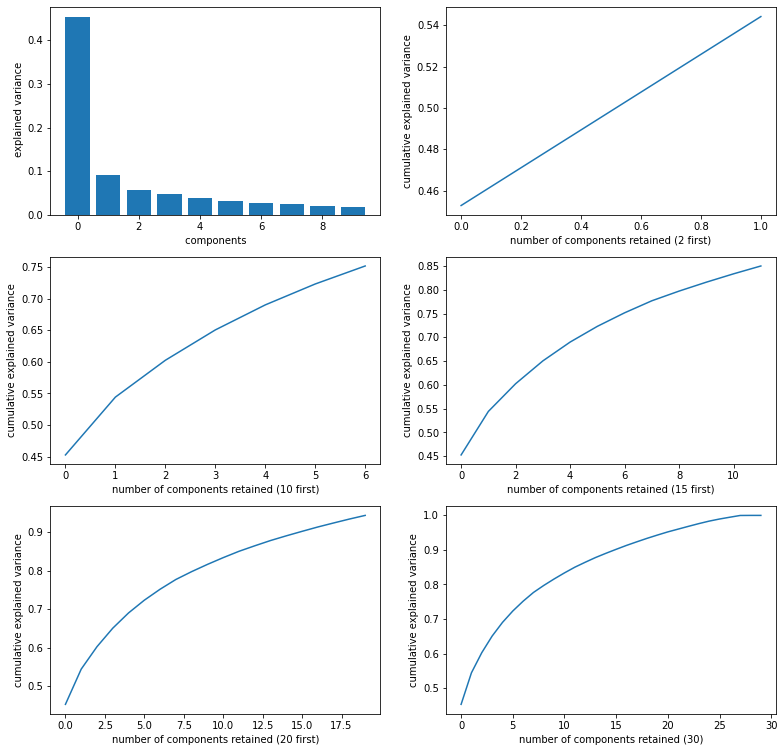

In [13]:
#Compute a PCA with 30 components
pca = PCA(n_components=30, whiten=True).fit(array_of_vectors)

Principal_Components = pca.transform(array_of_vectors)

print (pca.explained_variance_ratio_[:10])
print(sum(pca.explained_variance_ratio_[:10]))

cumExplainedVar=np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(13, 13))
numOfComp=10
plt.subplot(3, 2, 1)
plt.bar(range(numOfComp),pca.explained_variance_ratio_[:numOfComp])
plt.xlabel(' components ')
plt.ylabel(' explained variance');


plt.subplot(3, 2, 2)
plt.plot(cumExplainedVar[:2])
plt.xlabel('number of components retained (2 first)')
plt.ylabel('cumulative explained variance');

plt.subplot(3, 2, 3)
plt.plot(cumExplainedVar[:7])
plt.xlabel('number of components retained (10 first)')
plt.ylabel('cumulative explained variance');

plt.subplot(3, 2, 4)
plt.plot(cumExplainedVar[:12])
plt.xlabel('number of components retained (15 first)')
plt.ylabel('cumulative explained variance');

plt.subplot(3, 2, 5)
plt.plot(cumExplainedVar[:20])
plt.xlabel('number of components retained (20 first)')
plt.ylabel('cumulative explained variance');

plt.subplot(3, 2, 6)
plt.plot(cumExplainedVar)
plt.xlabel('number of components retained (30)')
plt.ylabel('cumulative explained variance');

plt.show()

###***3.4) Ποιος ταξινομητής έχει τη καλύτερη επίδοση και γιατί;***

´Οπως φαίνεται από τα αποτελέσματα, καλύτερη επίδοση έχει ο linear SVM ταξινομητής. Αυτό οφείλεται στο γεγονός ότι μπορεί σε κάποια σημεία και στις γύρω περιοχές τους να παρεμβάλλονται εικόνες που ανήκουν στην ίδια εποχή, αλλά όπως είπαμε και προηγουμένως μπορεί μία εικόνα του φθινοπώρου και μία εικόνα της άνοιξης να είναι ακριβώς δίπλα. Ως αποτέλεσμα η επιλογή του κοντινότερου γείτονα για την εύρεση της κλάσης-εποχής σε αυτή την περίπτωση θα είναι παραπλανητική. Άρα καταλαβαίνουμε πως ο 1-ΝΝ ταξινομητής έχει αυξημένη πιθανότητα λάθους και γι’ αυτό δίνει χαμηλότερα σκορ.

## ***Question 2*** - *Κανονικοποιημένη μη-αρνητική παραγοντοποίηση πινάκων*

Έχουμε το παρακάτω πρόβλημα βελτιστοποίησης για την κανονικοποιημένη  μη-αρνητική παραγοντοποίηση πινάκων:

$ ∥X − WC∥^2_F + λ∥W∥^2_F + λ∥C∥^2_F s.t.W ≥ 0, C ≥ 0$

Το πρόβλημα αυτό, εφόσον δεν έχει λύση σε κλειστή μορφή, καλούμαστε να βρούμε τον επαναληπτικό αλγόριθμο σε μία συνάρτηση RegNMF(X,k,lambda,epsilon), όπου Χ ένας μη αρνητικός πίνακας d x N, το πλήθος των συνιστωσών k, τη τιμή της παραμέτρου κανονικοποίησης λ, το κατώφλι τερματισμού ε και επιστέφει τους μη αρνητικούς πίνακες W διαστασης dxk και C διάστασης kxN.

Ας ξεκινήσουμε να βρούμε τον επαναληπτικό αλγόριθμο με την μέθοδο gradient descent step. Η γενικη αρχή είναι ότι σε κάθε βήμα του αλγορίθμου κινούμαστε προς την κατεύθυνση όπου η κλίση της συνάρτησης είναι αρνητική (αρνητική τιμή της παραγώγου της συνάρτησης) μέχρι να φτάσουμε σε ένα τοπικό ελάχιστο.

H λύση βασίζεται σε έναν MU (multiplicative Update) αλγόριθμο του οποίου τα βασικά βήματα είναι Αρχικοποίηση WC με μη αρνητικές τιμές και σε κάθε βήμα υπολόγισε:

$C_{[t+1]} =C_{[t]}*\frac{W_{[t]}^TX}{W_{[t]}^TW_{[t]}C_{[t]}+λC_{[t]}} $ και

$W_{[t+1]} =W_{[t]}*\frac{C_{[t]}^TΧ}{W_{[t]}C_{[t]}C_{[t]}^T+λW_{[t]}} $

όπου t = t +1

 To * συμβολίζει το γινόμενο Hadamard (δηλ. γινόμενο στοιχείο προς στοιχείο του
πίνακα)

Ο αλγόριθμος αυτός υπολογίστηκε με βάσει τους τύπους από την θεωρία του μαθήματος και συγκεκριμένα:

$ C_{[t+1]} = C_{[t]} − n_{C}∇_{C_{[t]}}ℓ(W,C[t]) $

$ W_{[t+1]} = W_{[t]} − n_{W}∇_{W_{[t]}}ℓ(W[t],C) $ (Β)

όπου t = t + 1

και $n_W =\frac{W}{∇_{W}f(W,C)^+}$ , $n_C =\frac{C}{∇_{C}f(W,C)^+}$ τα learning rates ή step sizes 

(O συμβολισμός + στο ανάδελτα του παρονομαστή σημαίνει ότι παίρνουμε μόνο τους θετικούς όρους του ανάδελτα της συνάρτησης ελαχιστοποίησης)

Αρχικά, ας υπολογίσουμε το ανάδελτα της μεταβλητής W και στην συνέχεια η ίδια διαδικασία ισχύει και για την μεταβλητή C. 

Σύμφωνα με δύο βασικές ιδιότητες $∥X∥^2=Tr(X^TX)$ και $Tr(A+B)=Tr(A)+Tr(B)$ και την ιδιότητα της επιμεριστικής έχουμε:


$ ∥X − WC∥^2_F + λ∥W∥^2_F + λ∥C∥^2_F = Tr((X − WC)^T(X − WC)) + λTr(W^TW) + λTr(C^TC)$



$ = Tr(XX^T-X^TWC-XW^TC^T+WW^TCC^T) + λTr(W^TW) + λTr(C^TC)$
$ = Tr(XX^T)-Tr(X^TWC)-Tr(XW^TC^T)+Tr(WW^TCC^T) + λTr(W^TW) + λTr(C^TC) (Α)$

Για κάθε έναν όρο της παραπάνω εξίσωσης έχουμε:

- $∇_{W}Tr(X^TX)=0$
- $∇_{W}Tr(C^TC)=0$
- $∇_{W}Tr(W^TW)=W$ 
  
  (από ιδιότητα $∇_{X}Tr(X^TA)=A$) 
- $∇_{W}Tr(X^TWC)= (X^TC)^T = C^TX$ 

  (από ιδιότητα $∇_{X}Tr(AX)=A^T$)
- $∇_{W}Tr(XW^TC^T)=C^TX$  

  (από $∇_{X}Tr(X^TA)=A$)
- $∇_{W}Tr(WW^TCC^T)=W(CC^T+(CC^T)^T)=2WCC^T$  

  (από ιδιότητα $∇_{X}Tr(XAX^T)=X(A+A^T)$)

Συνεπώς, από (Α) καταλήγουμε σε:

$∇_{W}f(W,C)= -2XC^T + 2WCC^T + λW$ (Γ)

Όσον αφορά το learning rate έχουμε από (Γ):

$n_W =\frac{W}{∇_{W}f(W,C)^+} = \frac{W}{WCC^T + λW}$

όπου η σταθερές 2 αγνοήθηκαν γιατί ενσωματώνεται στο learning rate, σύμφωνα και με τις διαφάνειες του μαθήματος.

Άρα από (Β) έχουμε:

$W = W - η_W⋅(-XC^T + WCC^T + λW) $

$ = W - \frac{W}{WCC^T + λW}⋅(-XC^T + WCC^T + λW) $

$ = W - \frac{W}{WCC^T + λW}⋅(-XC^T + WCC^T + λW) $

$ = \frac{WWCC^T+λWW +XC^TW-WWCC^T-λWW}{WCC^T + λW}$

Τελικά προκύπτει:


$W = W*\frac{XC^T}{WCC^T + λW}$

***Σημείωση:***
- Όμοια υπολογίζουμε και τον update τύπο για την μεταβλητή C και προκύπτει όπως έγραψα παραπάνω.
- Για επαλήθευση των update τύπων υπάρχει η εξής ιδιότητα:
  $θ←θ⋅\frac{∇_θf(θ)^-}{∇_θf(θ)^+}$, όπου $∇_θf(θ)^-$ and $∇_θf(θ)^+$ είναι οι αρνητικοί όροι και οι θετικοί όροι, αντίστοιχα, του ανάδελτα $∇_θf(θ)$. 

  Από τον τύπο (Γ) προκύπτει πως:
$∇_θf(θ)^- = ΧC^T$ και $∇_θf(θ)^+ = WCC^T+λW$, άρα πράγματι και με αυτόν τον τρόπο έχουμε: $W = W*\frac{XC^T}{WCC^T + λW}$
- Πρέπει να σημειωθεί, πως επειδή δεν αναλυόταν εκτενώς ο τρόπος που βγαίνουν οι τύποι στις διαφάνειες, με μία γρήγορη αναζήτηση στο διαδίκτυο βρήκα μία σελίδα που με βοήθησε αρκετά στην κατανόηση των τύπων και να βγάλω κι εγώ αντίστοιχα τους παραπάνω multiplicative update τύπους. Η σελίδα αυτή είναι: https://stats.stackexchange.com/questions/351359/deriving-multiplicative-update-rules-for-nmf?fbclid=IwAR25Yrx3Ue39ZbFnZfJl9VJR0nwsWME5nx_r23--b7e7cqMkJy7j1cDCMmw

### ***Επαναληπτικός Αλγόριθμος για την επίλυση του παραπάνω προβλήματος βελτιστοποίησης***

In [14]:
import numpy as np
import numpy.linalg as LA

def frobenius_norm(X,W,C):
  error = LA.norm(X - np.dot(W, C))/ LA.norm(X)
  return error

def update_c(X,W,C,l):
  numerator = np.dot(W.T, X)
  denominator = np.dot(W.T.dot(W), C) + l*C
  C *= numerator
  C /= denominator
  return C

def update_w(X,W,C,l):
  numerator = X.dot(C.T)
  denominator = W.dot(C.dot(C.T)) + l*W 
  W *= numerator
  W /= denominator
  return W

def RegNMF(X,k,l,epsilon):
  d, Ν = X.shape
  W = np.random.random((d, k))
  C = np.random.random((k, Ν))
  C_old = C

  C=update_c(X,W,C_old,l)
  W=update_w(X,W,C_old,l)
  frobError_previous = frobenius_norm(X,W,C)

  C_old = C
  C=update_c(X,W,C_old,l)
  W=update_w(X,W,C_old,l)
  frobError_next = frobenius_norm(X,W,C)
  i=2
  while abs(frobError_previous - frobError_next) >= epsilon:
    frobError_previous = frobError_next
    C_old = C
    C=update_c(X,W,C_old,l)
    W=update_w(X,W,C_old,l)
    frobError_next = frobenius_norm(X,W,C)
    i += 1
  print("The local minimum happens at", i, "th iteration with k =",k , "and epsilon =", epsilon)
  
  return (W, C, frobError_next, i)


### ***Συνάρτηση testing διαφόρων τιμών Κ, lambda, epsilon***

In [15]:
#This is a function that tests the above algorithm with multiple values of K, e and lamda
#and returns the number of iterations that it needs to terminate
def Num_Of_Iterations(X,l):
  k = [1,10,100]
  e = [0.1, 0.01, 0.001]
  iter = []

  for kapa in k:
    for epsilon in e:
      W, C, frobError, i = RegNMF(X,kapa,l,epsilon)
      iter.append(i)

  return iter

### ***Δοκιμή και Αποθήκευση αποτελεσμάτων σε dataframe***

In [16]:
import pandas as pd 

#Create an array of the given shape and populate it with random samples from a uniform distribution over [0, 1)
X_1 = np.random.rand(500, 1000)

#Confirms that the elements of array have positive values
X = np.where(X_1<0, abs(X_1), X_1) 

iter = []
l = 0.1

print("For lambda=0.1")

iter = Num_Of_Iterations(X, l)

#Put the results of the algorithm in dataframe, so I can visualize them later
data_0 = [[iter[0],1,0.1], [iter[1],1,0.01], [iter[2],1,0.001], [iter[3],10,0.1], [iter[4],10,0.01], [iter[5],10,0.001], [iter[6],100,0.1], [iter[7],100,0.01], [iter[8],100,0.001]]
df_0 = pd.DataFrame(data_0, columns = ['Iteration', 'K', 'e'])

print("\n################################################################################\n")

iter = []
l = 1

print("For lambda=1")

iter = Num_Of_Iterations(X, l)

#Put the results of the algorithm in dataframe, so I can visualize them later
data = [[iter[0],1,0.1], [iter[1],1,0.01], [iter[2],1,0.001], [iter[3],10,0.1], [iter[4],10,0.01], [iter[5],10,0.001], [iter[6],100,0.1], [iter[7],100,0.01], [iter[8],100,0.001]]
df = pd.DataFrame(data, columns = ['Iteration', 'K', 'e'])

print("\n################################################################################\n")

iter = []
l = 10

print("For lambda=10")

iter = Num_Of_Iterations(X, l)

#Put the results of the algorithm in dataframe, so I can visualize them later
data_1 = [[iter[0],1,0.1], [iter[1],1,0.01], [iter[2],1,0.001], [iter[3],10,0.1], [iter[4],10,0.01], [iter[5],10,0.001], [iter[6],100,0.1], [iter[7],100,0.01], [iter[8],100,0.001]]
df_1 = pd.DataFrame(data_1, columns = ['Iteration', 'K', 'e'])

print("\n################################################################################\n")

iter = []
l = 50

print("For lambda=50")

iter = Num_Of_Iterations(X, l)

#Put the results of the algorithm in dataframe, so I can visualize them later
data_2 = [[iter[0],1,0.1], [iter[1],1,0.01], [iter[2],1,0.001], [iter[3],10,0.1], [iter[4],10,0.01], [iter[5],10,0.001], [iter[6],100,0.1], [iter[7],100,0.01], [iter[8],100,0.001]]
df_2 = pd.DataFrame(data_2, columns = ['Iteration', 'K', 'e'])

print("\n################################################################################\n")

iter = []
l = 100

print("For lambda=100")

iter = Num_Of_Iterations(X, l)

#Put the results of the algorithm in dataframe, so I can visualize them later
data_3 = [[iter[0],1,0.1], [iter[1],1,0.01], [iter[2],1,0.001], [iter[3],10,0.1], [iter[4],10,0.01], [iter[5],10,0.001], [iter[6],100,0.1], [iter[7],100,0.01], [iter[8],100,0.001]]
df_3 = pd.DataFrame(data_3, columns = ['Iteration', 'K', 'e'])

print("\n################################################################################\n")

iter = []
l = 300

print("For lambda=300")

iter = Num_Of_Iterations(X, l)

#Put the results of the algorithm in dataframe, so I can visualize them later
data_4 = [[iter[0],1,0.1], [iter[1],1,0.01], [iter[2],1,0.001], [iter[3],10,0.1], [iter[4],10,0.01], [iter[5],10,0.001], [iter[6],100,0.1], [iter[7],100,0.01], [iter[8],100,0.001]]
df_4 = pd.DataFrame(data_4, columns = ['Iteration', 'K', 'e'])

print("\n################################################################################\n")

iter = []
l = 500

print("For lambda=500")

iter = Num_Of_Iterations(X, l)

#Put the results of the algorithm in dataframe, so I can visualize them later
data_5 = [[iter[0],1,0.1], [iter[1],1,0.01], [iter[2],1,0.001], [iter[3],10,0.1], [iter[4],10,0.01], [iter[5],10,0.001], [iter[6],100,0.1], [iter[7],100,0.01], [iter[8],100,0.001]]
df_5 = pd.DataFrame(data_5, columns = ['Iteration', 'K', 'e'])

print("\n################################################################################\n")

iter = []
l = 1000

print("For lambda=1000")

iter = Num_Of_Iterations(X, l)

#Put the results of the algorithm in dataframe, so I can visualize them later
data_6 = [[iter[0],1,0.1], [iter[1],1,0.01], [iter[2],1,0.001], [iter[3],10,0.1], [iter[4],10,0.01], [iter[5],10,0.001], [iter[6],100,0.1], [iter[7],100,0.01], [iter[8],100,0.001]]
df_6 = pd.DataFrame(data_6, columns = ['Iteration', 'K', 'e'])

For lambda=0.1
The local minimum happens at 2 th iteration with k = 1 and epsilon = 0.1
The local minimum happens at 2 th iteration with k = 1 and epsilon = 0.01
The local minimum happens at 2 th iteration with k = 1 and epsilon = 0.001
The local minimum happens at 2 th iteration with k = 10 and epsilon = 0.1
The local minimum happens at 2 th iteration with k = 10 and epsilon = 0.01
The local minimum happens at 3 th iteration with k = 10 and epsilon = 0.001
The local minimum happens at 2 th iteration with k = 100 and epsilon = 0.1
The local minimum happens at 2 th iteration with k = 100 and epsilon = 0.01
The local minimum happens at 2 th iteration with k = 100 and epsilon = 0.001

################################################################################

For lambda=1
The local minimum happens at 2 th iteration with k = 1 and epsilon = 0.1
The local minimum happens at 2 th iteration with k = 1 and epsilon = 0.01
The local minimum happens at 2 th iteration with k = 1 and epsilon 

### ***Οπτικοποίηση αποτελεσμάτων του επαναληπτικού αλγορίθμου σε Ηeatmaps***

Για τις διάφορες τιμές του λ, Κ και ε, οπτικοποιώ τον αριθμό των επαναλήψεων που χρειάστηκε ο αλγόριθμος για κάθε είσοδο, έτσι ώστε να τα ομαδοποιήσω και να μπορέσω να διεξάγω πιο εύκολα συμπεράσματα.

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:63: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


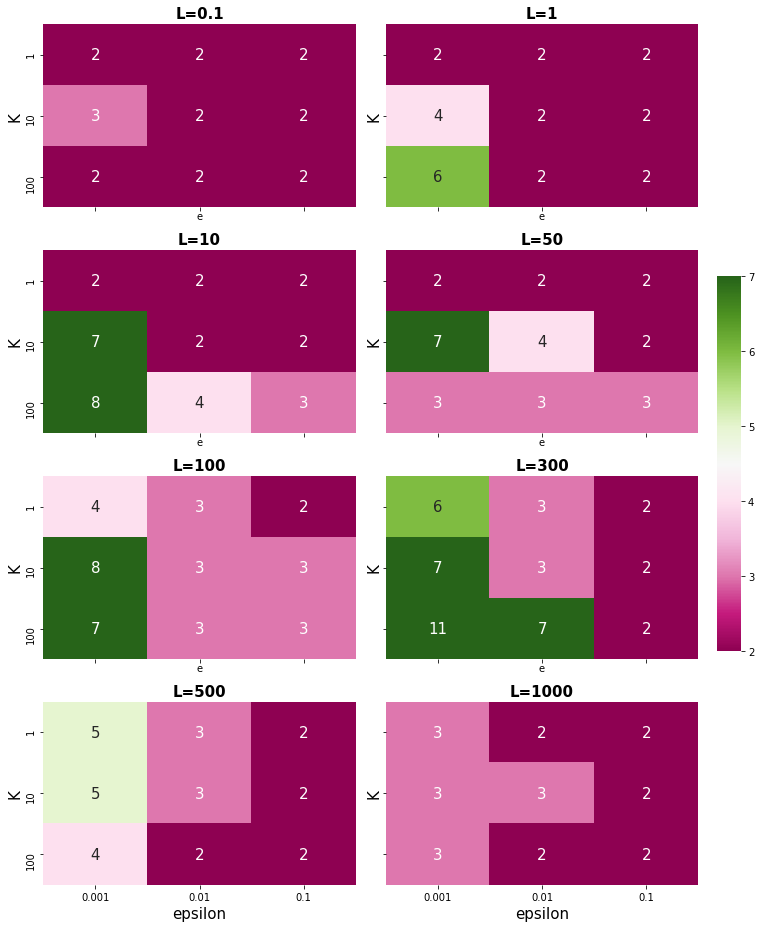

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axn = plt.subplots(4, 2, sharex=True, sharey=True, figsize=(11,13))
cbar_ax = fig.add_axes([.91, .3, .03, .4])

temp = 0

for i, ax in enumerate(axn.flat):

  if temp == 0:
    heatmap = pd.pivot_table(df_0, values='Iteration',index=['K'],columns='e')
    sns.heatmap(heatmap, cmap="PiYG", annot=True, annot_kws={"size": 15},  ax=ax, cbar=i == 0, vmin=2, vmax=7, cbar_ax=None if i else cbar_ax)
    ax.set_title('L=0.1', fontweight='bold', size=15)
    ax.set_ylabel('K', fontsize=15)

  if temp == 1:
    heatmap_1 = pd.pivot_table(df, values='Iteration',index=['K'],columns='e')
    sns.heatmap(heatmap_1, cmap="PiYG", annot=True, annot_kws={"size": 15}, ax=ax, cbar=i == 0, vmin=2, vmax=7, cbar_ax=None if i else cbar_ax)
    ax.set_title('L=1', fontweight='bold', size=15)
    ax.set_ylabel('K', fontsize=15)

  if temp == 2:
    heatmap_2 = pd.pivot_table(df_1, values='Iteration',index=['K'],columns='e')
    sns.heatmap(heatmap_2, cmap="PiYG", annot=True, annot_kws={"size": 15}, ax=ax, cbar=i == 0, vmin=2, vmax=7, cbar_ax=None if i else cbar_ax)
    ax.set_title('L=10', fontweight='bold', size=15)
    ax.set_ylabel('K', fontsize=15)

  if temp == 3:
    heatmap_3 = pd.pivot_table(df_2, values='Iteration',index=['K'],columns='e')
    sns.heatmap(heatmap_3, cmap="PiYG", annot=True, annot_kws={"size": 15}, ax=ax, cbar=i == 0, vmin=2, vmax=7, cbar_ax=None if i else cbar_ax)
    ax.set_title('L=50', fontweight='bold', size=15)
    ax.set_ylabel('K', fontsize=15)

  if temp == 4:
    heatmap_4 = pd.pivot_table(df_3, values='Iteration',index=['K'],columns='e')
    sns.heatmap(heatmap_4, cmap="PiYG", annot=True, annot_kws={"size": 15}, ax=ax, cbar=i == 0, vmin=2, vmax=7, cbar_ax=None if i else cbar_ax)
    ax.set_title('L=100', fontweight='bold', size=15)
    ax.set_ylabel('K', fontsize=15)

  if temp == 5:
    heatmap_5 = pd.pivot_table(df_4, values='Iteration',index=['K'],columns='e')
    sns.heatmap(heatmap_5, cmap="PiYG", annot=True, annot_kws={"size": 15}, ax=ax, cbar=i == 0, vmin=2, vmax=7, cbar_ax=None if i else cbar_ax)
    ax.set_title('L=300', fontweight='bold', size=15)
    ax.set_ylabel('K', fontsize=15)

  if temp == 6:
    heatmap_6 = pd.pivot_table(df_5, values='Iteration',index=['K'],columns='e')
    sns.heatmap(heatmap_6, cmap="PiYG", annot=True, annot_kws={"size": 15}, ax=ax, cbar=i == 0, vmin=2, vmax=7, cbar_ax=None if i else cbar_ax)
    ax.set_title('L=500', fontweight='bold', size=15)
    ax.set_xlabel('epsilon', fontsize=15)
    ax.set_ylabel('K', fontsize=15)

  if temp == 7:
    heatmap_7 = pd.pivot_table(df_6, values='Iteration',index=['K'],columns='e')
    sns.heatmap(heatmap_7, cmap="PiYG", annot=True, annot_kws={"size": 15}, ax=ax, cbar=i == 0, vmin=2, vmax=7, cbar_ax=None if i else cbar_ax)
    ax.set_title('L=1000', fontweight='bold', size=15)
    ax.set_xlabel('epsilon', fontsize=15)
    ax.set_ylabel('K', fontsize=15)
  
  temp = temp + 1

fig.tight_layout(rect=[0, 0, .9, 1])

### ***Συμπεράσματα των Αποτελεσμάτων***

**Γενικά**, παρατηρούμε σε κάθε διάγραμμα ότι οι τιμές των επαναλήψεων αυξάνονται καθώς κινούμαστε από τα δεξιά προς τα αριστερά, και από πάνω προς τα κάτω, δηλαδή όσο αυξάνεται το κ και όσο μειώνεται το ε.


Ας σχολιάσουμε, όμως, αναλυτικότερα την συμπεριφορά του αλγορίθμου σε συνάρτηση με τις διάφορες παραμέτρους:

- Όσον αφορά την παράμετρο ***k***:

	To k, που εκφράζει το πλήθος των συνιστωσών, παρατηρούμε σε γενικές γραμμές ότι όσο αυξάνεται η τιμή του, τόσο αυξάνεται και ο αριθμός των επαναλήψεων. Αυτό σημαίνει πως μειώνεται η ταχύτητα σύγκλισης του αλγορίθμου μας. Βέβαια, αυτό δεν ισχύει για όλες τις τιμές του λ, δηλαδή  λ>=500 ή λ=0.1 δεν παρατηρείται αυτή η συμπεριφορά, καθώς δεν υπάρχουν μεγάλες αυξήσεις στον αριθμό των επαναλήψεων.

- Όσον αφορά την παράμετρο ***λ***:

	Το λ είναι μία παράμετρος κανονικοποίησης, που αφορά στην ισχύ της ποινής που προστίθεται κάθε φορά. Επειδή στόχος μας είναι η ελαχιστοποίηση της συνάρτησης κόστους γενικά θα πρέπει ο συντελεστής να μειώνει τη συνολική παράσταση δηλαδή να διατηρεί ένα πολύ χαμηλό άθροισμα. Σε γενικές γραμμές μπορεί κανείς να ισχυριστεί το γεγονός ότι όσο αυξάνεται τόσες περισσότερες επαναλήψεις του αλγορίθμου έχουμε. Αυτό ξανά δεν αποτελεί κανόνα, αφού παρατηρείται ότι ο αριθμός των επαναλήψεων αυξάνεται μέχρι την τιμή λ=300. Συγκεκριμένα,  για τις μετέπειτα τιμές του λ (500, 1000) βλέπουμε πως ο αριθμός τον επαναλήψεων αρχίζει να φθίνει και να σταθεροποιείται σε μικρότερες τιμές. Άρα, για λ=300 θα λέγαμε ότι παρουσιάζει την μέγιστη τιμή επαναλήψεων = 11. Γενικά, λοιπόν, για πολύ μικρές τιμές λ (μικρότερες της μονάδας) ή πολύ μεγάλες (μεγαλύτερες του 500) ο αλγόριθμος κάνει λίγες επαναλήψεις και παρουσιάζει καλές επιδόσεις, ενώ για τιμές που παρουσιάζονται στο διάστημα [10, 300] κάνει πολλές επαναλήψεις και δεν είναι τόσο γρήγορος.

- Όσον αφορά το ***epsilon***:

	Tο epsilon είναι το κατώφλι τερματισμού του αλγορίθμου, και όπως φαίνεται στο διάγραμμα, όσο μειώνεται η τιμή του τόσο αυξάνονται οι επαναλήψεις. Η μέγιστη τιμή επαναλήψεων=11 παρατηρείται για ε=0.001, λ=300 και κ=100. Συγκεκριμένα, προκειμένου να αποδείξω την παραπάνω ιδιότητα, δοκίμασα να τρέξω τον αλγόριθμο για της ίδιες τιμές του κ, για λ={1, 10} και για ε={0.00001, 0.000001, 0.0000001} δηλαδή για ακόμα μικρότερες τιμές. Όπως περιμένα, τα αποτελέσματα άργησαν πολύ να εμφανιστούν, καθώς οι επαναλήψεις έφταναν μέχρι τις 8692 για λ=1 κ=100 και ε=0.0000001! Έτσι φαίνεται ότι ενώ προηγουμένως ο μέγιστος αριθμός επαναλήψεων ήταν 11, τώρα το σφάλμα ανακατασκευής έχει τεράστια απόκλιση από το προηγούμενο και η ταχύτητα σύγκλισης είναι πολύ πιο αργή. 

***Συμπερασματικά***, μπορούμε να ισχυριστούμε ότι, το μεγαλύτερο πλήθος επαναλήψεων (στις περισσότερες περιπτώσεις) βρίσκεται τέρμα κάτω αριστερά σε κάθε διάγραμμα, δηλαδή για κ=100 και ε=0.001, ενώ οι λιγότερες επαναλήψεις βρίσκονται τέρμα πάνω δεξιά, δηλαδή για κ=1 και ε=0.1.

In [18]:
#This is a function that tests the above algorithm with multiple values of K, e and lamda
#and returns the number of iterations that it needs to terminate
def Num_Of_Iterations_2(X,l):
  k = [1,10,100]
  e = [0.00001, 0.000001, 0.0000001]
  iter = []

  for kapa in k:
    for epsilon in e:
      W, C, frobError, i = RegNMF(X,kapa,l,epsilon)
      iter.append(i)

  return iter

In [19]:
iter = []
l = 1

print("For lambda=1")

iter = Num_Of_Iterations_2(X, l)

#Put the results of the algorithm in dataframe, so I can visualize them later
data_7 = [[iter[0],1,0.00001], [iter[1],1,0.000001], [iter[2],1,0.0000001], [iter[3],10,0.00001], [iter[4],10,0.000001], [iter[5],10,0.0000001], [iter[6],100,0.00001], [iter[7],100,0.000001], [iter[8],100,0.0000001]]
df_7 = pd.DataFrame(data_7, columns = ['Iteration', 'K', 'e'])

iter = []
l = 10

print("\n#########################################################\n")
print("For lambda=10")

iter = Num_Of_Iterations_2(X, l)

#Put the results of the algorithm in dataframe, so I can visualize them later
data_8 = [[iter[0],1,0.00001], [iter[1],1,0.000001], [iter[2],1,0.0000001], [iter[3],10,0.00001], [iter[4],10,0.000001], [iter[5],10,0.0000001], [iter[6],100,0.00001], [iter[7],100,0.000001], [iter[8],100,0.0000001]]
df_8 = pd.DataFrame(data_8, columns = ['Iteration', 'K', 'e'])

For lambda=1
The local minimum happens at 3 th iteration with k = 1 and epsilon = 1e-05
The local minimum happens at 3 th iteration with k = 1 and epsilon = 1e-06
The local minimum happens at 3 th iteration with k = 1 and epsilon = 1e-07
The local minimum happens at 218 th iteration with k = 10 and epsilon = 1e-05
The local minimum happens at 658 th iteration with k = 10 and epsilon = 1e-06
The local minimum happens at 1899 th iteration with k = 10 and epsilon = 1e-07
The local minimum happens at 515 th iteration with k = 100 and epsilon = 1e-05
The local minimum happens at 1905 th iteration with k = 100 and epsilon = 1e-06
The local minimum happens at 8692 th iteration with k = 100 and epsilon = 1e-07

#########################################################

For lambda=10
The local minimum happens at 14 th iteration with k = 1 and epsilon = 1e-05
The local minimum happens at 34 th iteration with k = 1 and epsilon = 1e-06
The local minimum happens at 56 th iteration with k = 1 and ep

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


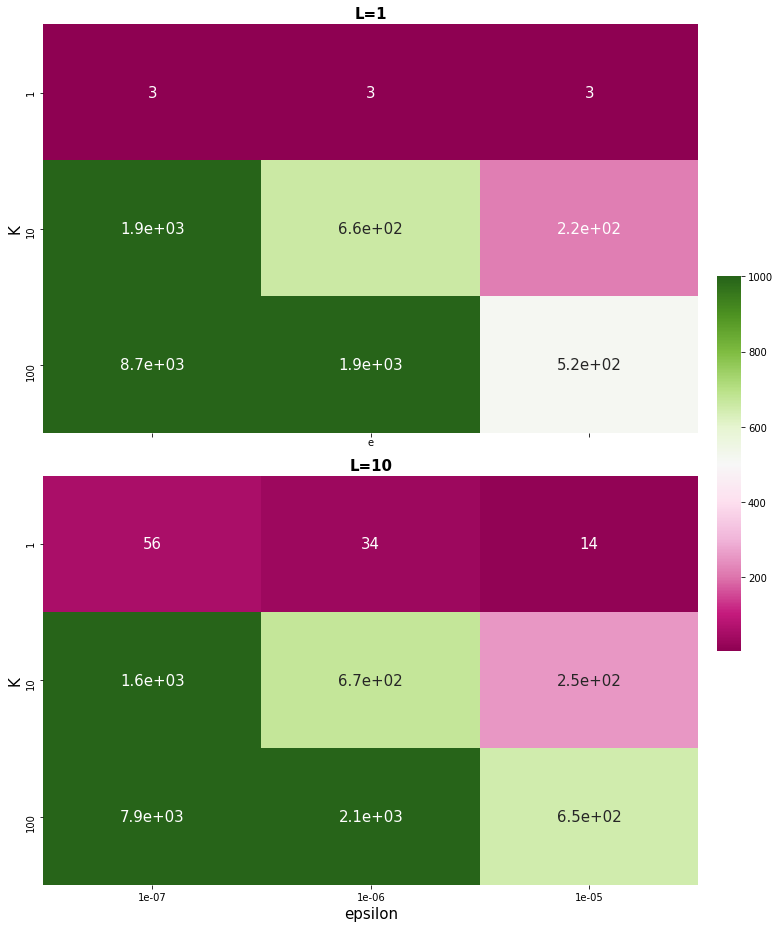

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axn = plt.subplots(2, 1, sharex=True, sharey=True, figsize=(11,13))
cbar_ax = fig.add_axes([.91, .3, .03, .4])

temp = 0

for i, ax in enumerate(axn.flat):

  if temp == 0:
    heatmap = pd.pivot_table(df_7, values='Iteration',index=['K'],columns='e')
    sns.heatmap(heatmap, cmap="PiYG", annot=True, annot_kws={"size": 15},  ax=ax, cbar=i == 0, vmin=5, vmax=1000, cbar_ax=None if i else cbar_ax)
    ax.set_title('L=1', fontweight='bold', size=15)
    ax.set_ylabel('K', fontsize=15)

  if temp == 1:
    heatmap_1 = pd.pivot_table(df_8, values='Iteration',index=['K'],columns='e')
    sns.heatmap(heatmap_1, cmap="PiYG", annot=True, annot_kws={"size": 15}, ax=ax, cbar=i == 0, vmin=5, vmax=1000, cbar_ax=None if i else cbar_ax)
    ax.set_title('L=10', fontweight='bold', size=15)
    ax.set_ylabel('K', fontsize=15)
    ax.set_xlabel('epsilon', fontsize=15)

  temp = temp + 1

fig.tight_layout(rect=[0, 0, .9, 1])